In [7]:
from IPython.display import display
from sunpy.io.cdf import read_cdf
import matplotlib.pyplot as plt

# Solar Orbiter 8 Data Workshop Data Analysis Tuotiral | Download MAG Data

## References

- [Solar Orbiter SOC Public / Archive Support Data](https://issues.cosmos.esa.int/solarorbiterwiki/display/SOSP/Archive+Support+Data#ArchiveSupportData-MAGInstrument)
- [MAG Data Product Description Document](https://issues.cosmos.esa.int/solarorbiterwiki/display/SOSP/Archive+Support+Data?preview=/60885589/60885645/SOL-MAG-DPDD_i2r0_28Sep20.pdf#ArchiveSupportData-MAGInstrument)
- [MAG User Guide](https://issues.cosmos.esa.int/solarorbiterwiki/download/attachments/60885589/Solar%20Orbiter%20magnetometer%20user%20guide_i1.pdf?version=1&modificationDate=1601306417000&api=v2)

## MAG Metadata introduction

There are many important things for end users to consider when using MAG data. The [MAG User Guide](https://issues.cosmos.esa.int/solarorbiterwiki/download/attachments/60885589/Solar%20Orbiter%20magnetometer%20user%20guide_i1.pdf?version=1&modificationDate=1601306417000&api=v2) provides an exellent focused summary of how to use MAG data and what to be aware of. As an end user of MAG data products this is a document you should read.

If you want more details then the [MAG Data Product Description Document](https://issues.cosmos.esa.int/solarorbiterwiki/display/SOSP/Archive+Support+Data?preview=/60885589/60885645/SOL-MAG-DPDD_i2r0_28Sep20.pdf#ArchiveSupportData-MAGInstrument) provides a full specification of all MAG data products and a high level summary of the transformations performed on MAG data to go from raw telemetry to MAGs L2 data products.

For each month of MAG data released there is a Data Release Report. You should always read this document if you are using data from the associated month. It provides a detailed report for that months data and includes any information end users should be aware of when using that months data. You can find the list of all published Data Release Reports online at [Solar Orbiter SOC Public / Archive Support Data](https://issues.cosmos.esa.int/solarorbiterwiki/display/SOSP/Archive+Support+Data#ArchiveSupportData-MAGInstrument).

In this notebook we will focus on several important metatdata time series that a included in every L2 data product. These metadata are

- `QUALITY_BITMASK`
- `QUALITY_FLAG`
- `VECTOR_RANGE`
- `VECTOR_TIME_RESOLUTION`

<sunpy.timeseries.timeseriesbase.GenericTimeSeries object at 0x7f17ca3a0190>
|-------------------------------------------------------------------------------------------------|
|TimeRange                  | Columns         | Meta                                              |
|-------------------------------------------------------------------------------------------------|
|2021-11-27T00:00:00.114000 | B_RTN_0         | Project: Solar Orbiter                            |
|            to             | B_RTN_1         | Source_name: SOLO>Solar Orbiter                   |
|2021-11-27T23:59:59.876001 | B_RTN_2         | Discipline: Space Physics>Interplanetary Studies  |
|                           | QUALITY_BITMASK | Data_type: L2>Level 2 Calibrated Data             |
|                           | QUALITY_FLAG    | Descriptor: MAG>Magnetometer                      |
|                           | VECTOR_RANGE    | Data_version: 01                                  |
|                           | VECTOR_TIME_RES | Software_version: 2.12                            |
|                           |                 | Skeleton_version: 11                              |
|                           |                 | PI_name: T. Horbury                               |
|                           |                 | PI_affiliation: The Blackett Laboratory, Imperial |
|                           |                 | ...                                               |
|-------------------------------------------------------------------------------------------------|

                             B_RTN_0    B_RTN_1   B_RTN_2  QUALITY_BITMASK  \
EPOCH                                                                        
2021-11-27 00:00:00.114000 -0.051527   1.599335  5.011946              128   
2021-11-27 00:00:00.239004 -0.025335   1.583783  5.005559              128   
2021-11-27 00:00:00.363999  0.024523   1.630089  4.991105              128   
2021-11-27 00:00:00.489003  0.041207   1.652747  4.996787              128   
2021-11-27 00:00:00.613997 -0.006170   1.641988  5.015910              128   
...                              ...        ...       ...              ...   
2021-11-27 23:59:59.376004 -3.583122  12.878136 -0.360063              160   
2021-11-27 23:59:59.500998 -3.591122  12.834685 -0.445543              160   
2021-11-27 23:59:59.626002 -3.582056  12.805394 -0.491278              160   
2021-11-27 23:59:59.750997 -3.555225  12.786918 -0.526899              160   
2021-11-27 23:59:59.876001 -3.680122  12.759019 -0.557622              160   

                            QUALITY_FLAG  VECTOR_RANGE  VECTOR_TIME_RESOLUTION  
EPOCH                                                                           
2021-11-27 00:00:00.114000             3             3                     8.0  
2021-11-27 00:00:00.239004             3             3                     8.0  
2021-11-27 00:00:00.363999             3             3                     8.0  
2021-11-27 00:00:00.489003             3             3                     8.0  
2021-11-27 00:00:00.613997             3             3                     8.0  
...                                  ...           ...                     ...  
2021-11-27 23:59:59.376004             2             3                     8.0  
2021-11-27 23:59:59.500998             2             3                     8.0  
2021-11-27 23:59:59.626002             2             3                     8.0  
2021-11-27 23:59:59.750997             2             3                     8.0  
2021-11-27 23:59:59.876001             2             3                     8.0  

[691208 rows x 7 columns]
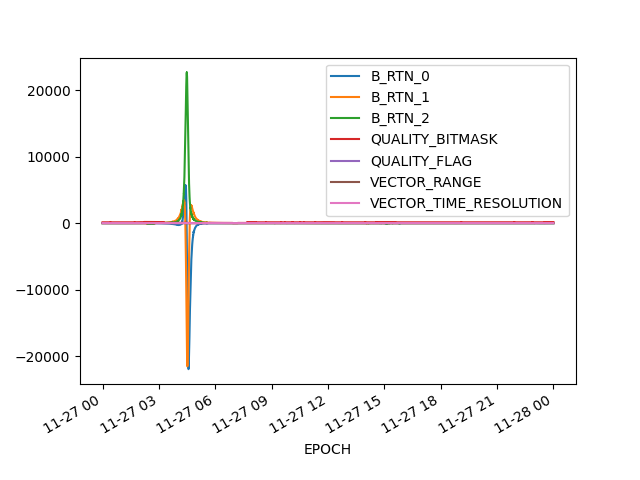

In [13]:
normal = read_cdf('data/solo_L2_mag-rtn-normal_20211127_V01.cdf')[0]
display(normal)

## `QUALITY_BITMASK`

There are 8 bits in the quality bit mask. All are set independently, and evaluated for normal and burst mode data individually. The bit mask exits to alert the user that:

1. The vector has been cleaned. This means that the vector value has been altered from the raw telemetered value due to detection and removal of a spacecraft induced field, OR
2. There is a potential issue with the data. This means that the user should beware that there is the potential of spacecraft contamination to this vector which has not been removed by the MAG team cleaning algorithms.

The quality bit mask bits are defined as follows:

| Bit | Binary | Name | Type of Flag | Definition | Impact on Quality Flag | Data source |
| -- | -- | -- | -- | -- | -- | -- |
| 1 | 1 | INBOARDPRIMARY | Warning | Raise if data is from Inboard sensor. | Set quality flag to 1 | MAG HK: Primary sensor is IB. |
| 2 | 2 | SCETUNSYNC | Warning | Raise if onboard time is not synchronised. | Set quality flag to 1 | MAG HK: Time is unsynchronised. |
| 3 | 4 | MAGHEATERON | Warning | Raise if MAG heater operational. While the influence of the heater on MAG data has been removed from the time series, periodic signals which correlate to this bitmask flag should be raised with the MAG team. | None | SC HK: MAG Heater status. |
| 4 | 8 | TONEREMOVED | Cleaning has occurred | Raise if interference tones were detected and removed. | None | Tone removal code sets flag. |
| 5 | 16 | THRUSTERREMOVED | Cleaning has occurred | Raise for thruster firing, for duration of cleaning algorithm correction time series. | Set quality flag to 2 | Thruster removal code sets flag, based on profile generated from analysis of data around thruster firing. Thruster firing detected from SC HK. OBS and IBS at same cadence required. |
| 6 | 32 | SCINTERFERENCE | Warning | Raise if SC generated interference detected through a large signal in IBS-OBS cleaned data. Covers timescales from around 1 second to 1 minute (algorithm based), time scales >1 hour via human analysis of time series. | Set quality flag to 2 | IBS-OBS > threshold. Requires analysis of cleaned IBS-OBS time series. |
| 7 | 64 | SAMOVEMENT | Warning | Raise at times of solar array movement. | Solar array movements cause changes in spacecraft generated offset at the MAG sensors both due to position and due to thermal impact on SC. Impact on offsets is taken into account generating the MAG data, but influence is not yet completely understood, and can last several hours (up to 17 hours following movement). Note this flag is also used to cover solar array lubrications, which usually consist of a 15 degree rotation one way and then back again. These do not have an impact on the data beyond the time when the arrays are moving, so the flag is raised for a shorter period. | Set quality flag to 2 | SC HK: SA angle, plus assessment of impact on offset reviewing IBS-OBS data. |
| 8 | 128 | INSTRUMENTREMOVED | Cleaning has occurred Raise if an interference field signal from instrument operation has been detected and removed. Note that not all signals are detected or removed. | None | Instrument current related removal code. |

In [58]:
INBOARDPRIMARY = (normal.data['QUALITY_BITMASK'] & 0b00000001)//1
SCETUNSYNC = (normal.data['QUALITY_BITMASK'] & 0b00000010)//2
MAGHEATERON = (normal.data['QUALITY_BITMASK'] & 0b00000100)//4
TONEREMOVED = (normal.data['QUALITY_BITMASK'] & 0b00001000)//8
THRUSTERREMOVED = (normal.data['QUALITY_BITMASK'] & 0b00010000)//16
SCINTERFERENCE = (normal.data['QUALITY_BITMASK'] & 0b00100000)//32
SAMOVEMENT = (normal.data['QUALITY_BITMASK'] & 0b01000000)//64
INSTRUMENTREMOVED = (normal.data['QUALITY_BITMASK'] & 0b10000000)//128

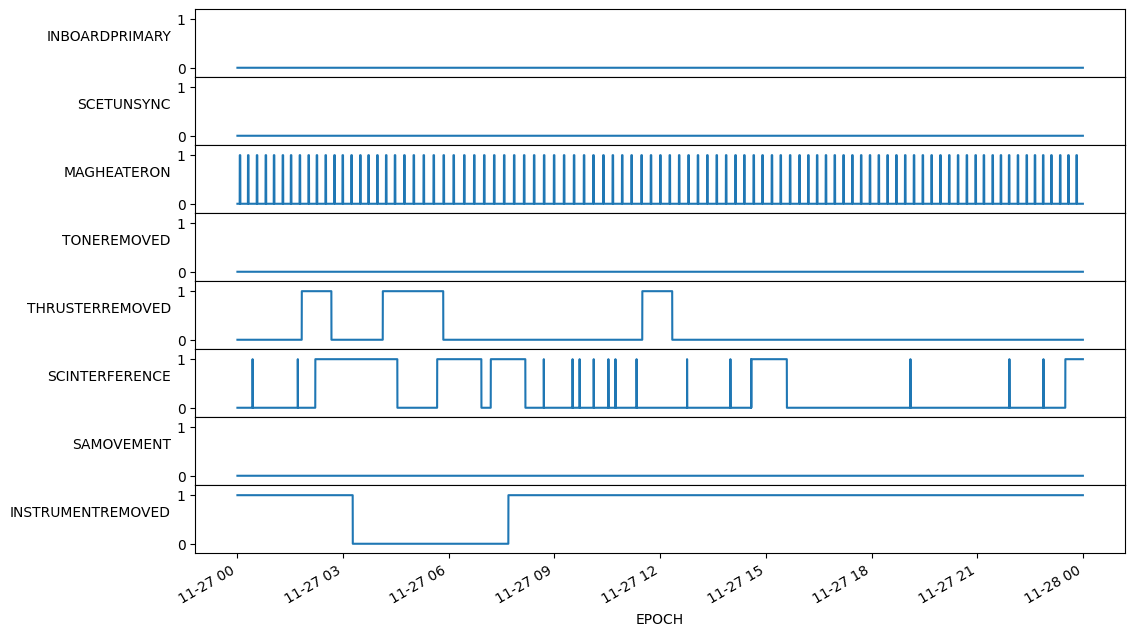

In [90]:
fig, ax = plt.subplots(8, 1)
fig.set_size_inches(12, 8)
fig.subplots_adjust(hspace=0)

INBOARDPRIMARY.plot(ax=ax[0])
ax[0].set_ylabel('INBOARDPRIMARY', rotation='horizontal', horizontalalignment='right')
SCETUNSYNC.plot(ax=ax[1])
ax[1].set_ylabel('SCETUNSYNC', rotation='horizontal', horizontalalignment='right')
MAGHEATERON.plot(ax=ax[2])
ax[2].set_ylabel('MAGHEATERON', rotation='horizontal', horizontalalignment='right')
TONEREMOVED.plot(ax=ax[3])
ax[3].set_ylabel('TONEREMOVED', rotation='horizontal', horizontalalignment='right')
THRUSTERREMOVED.plot(ax=ax[4])
ax[4].set_ylabel('THRUSTERREMOVED', rotation='horizontal', horizontalalignment='right')
SCINTERFERENCE.plot(ax=ax[5])
ax[5].set_ylabel('SCINTERFERENCE', rotation='horizontal', horizontalalignment='right')
SAMOVEMENT.plot(ax=ax[6])
ax[6].set_ylabel('SAMOVEMENT', rotation='horizontal', horizontalalignment='right')
INSTRUMENTREMOVED.plot(ax=ax[7])
ax[7].set_ylabel('INSTRUMENTREMOVED', rotation='horizontal', horizontalalignment='right')

for i, _ax in enumerate(ax):
    if i != 7:
        _ax.set_xticks([])
    _ax.set_ylim([-0.2,1.2])
    _ax.set_yticks([0,1])

plt.show()
plt.close(fig)

## `QUALITY_FLAG`

Each vector in L2 cdf files has a quality flag and quality bitmask associated with it. This alerts the user as to any potential issues with using the data. The quality flag is a high level indicator of data quality, it is derived from the quality bitmask and is defined in the table below. The reason for applying the flag as shown will be indicated by the bitmask. Note the flag for any given data point takes the lowest applicable quality level if more than one bit in the bitmask is raised.

| Flag | Definition |
| -- | -- |
| 0 | Bad data |
| 1 | Known problems use at your own risk |
| 2 | Survey data, possibly not publication quality |
| 3 | Good for publication, subject to PI approval |
| 4 | Excellent data which has received special treatment |

<AxesSubplot:xlabel='EPOCH'>

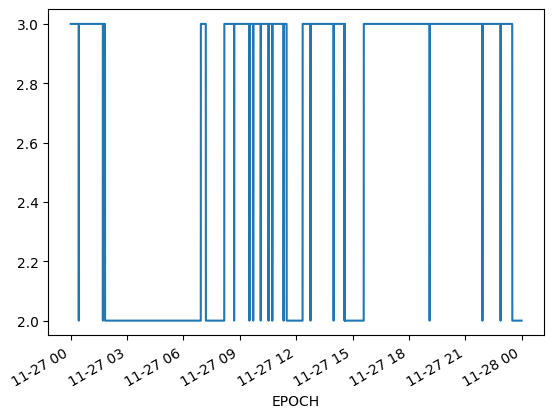

In [18]:
normal.data['QUALITY_FLAG'].plot()

For this data we see that the lowest quality is level 2. We can reconstruct this quality level by looking at the `QUALITY_BITMASK` flags that conrespond to quality level 2 data 

<AxesSubplot:xlabel='EPOCH'>

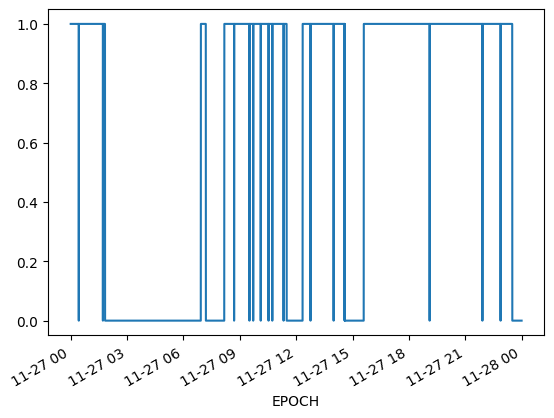

In [ ]:
(1-(THRUSTERREMOVED | SCINTERFERENCE | SAMOVEMENT)).plot()

## `VECTOR_RANGE`

The instrument telemeters a fixed number of bits for each field component, so in order to maximise precision each sensor has four ranges (0,1,2,3) and autonomously changes between them based on the ambient field magnitude: see Table 1. Range 3 is the most precise range and OBS has spent almost all of its time in this range; IBS has spent time in ranges 2 and 3. Small field errors can occur around range changes and we have replaced a small number of data points with NaNs around these times. The range is recorded in the `VECTOR_RANGE` variable in the CDF files.

| Range code | Nominal Range in nT | Nominal Digital Resolution |
| -- | -- | -- |
| 3 | ±128nT | 4pT |
| 2 | ±512nT | 16pT |
| 1 | ±2048nT | 64pT |
| 0 | ±60000nT | 1.8nT |

<AxesSubplot:xlabel='EPOCH'>

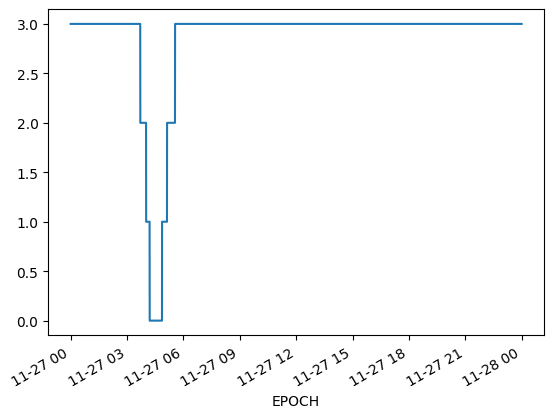

In [91]:
normal.data['VECTOR_RANGE'].plot()

## `VECTOR_TIME_RESOLUTION`

Normal mode data is generated continuously whenever the instrument is in science mode; this is typically 8 vectors/s from the outboard sensor during the cruise phase but at times can be 16 vectors/s or 1 vector/s.

Burst mode data, at either 64 or 128 vectors/s, is produced when telemetry allows. Sometimes we have 24 hours/day of burst mode for many days; at other times, just a few short intervals per day. Burst mode files therefore vary significantly in size from day to day and care also needs to be taken since the cadence of the data can also vary.

The instantaneous frequency of the normal and burst mode data is reported in the `VECTOR_TIME_RESOLUTION`.

<AxesSubplot:xlabel='EPOCH'>

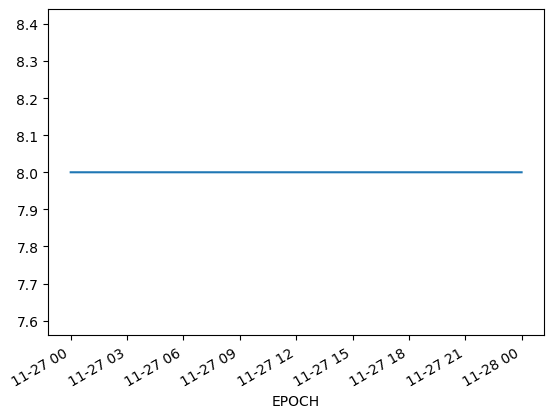

In [92]:
normal.data['VECTOR_TIME_RESOLUTION'].plot()